In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
#Load Data
df = pd.read_csv('Data/Bitcoin Historical Data Daily 5yr.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1828 non-null   object
 1   Price     1828 non-null   object
 2   Open      1828 non-null   object
 3   High      1828 non-null   object
 4   Low       1828 non-null   object
 5   Vol.      1828 non-null   object
 6   Change %  1828 non-null   object
dtypes: object(7)
memory usage: 100.1+ KB


,Date,Price,Open,High,Low,Vol.,Change %
0,06/11/2019,"7,888.0","7,987.8","8,010.4","7,714.5",579.00K,-1.25%
1,06/12/2019,"8,133.1","7,888.0","8,198.1","7,805.8",607.89K,3.11%
2,06/13/2019,"8,219.0","8,132.4","8,306.1","8,028.6",574.21K,1.06%
3,06/14/2019,"8,656.1","8,218.6","8,685.3","8,153.2",643.17K,5.32%
4,06/15/2019,"8,812.5","8,655.8","8,856.7","8,582.3",608.69K,1.81%


In [4]:
print(df.isnull().sum())


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [5]:
#KONVERSI DATA

# Mengonversi kolom 'Date' ke tipe datetotime
df['Date'] = pd.to_datetime(df['Date'])

# konversi data Price
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Price'] = df['Price'].astype(float)

# konversi data Open
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].astype(float)

# konversi data High
df['High'] = df['High'].str.replace(',', '').astype(float)
df['High'] = df['High'].astype(float)

# konversi data Low
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].astype(float)

# Konversi kolom 'Vol' menjadi tipe data numerik
df['Vol'] = df['Vol.'].str.replace('K', 'e3').str.replace('M', 'e6').str.replace('B', 'e9').astype(float)

# Menerapkan konversi yang diberikan pada kolom 'Vol'
def convert_vol_to_numeric(volume_str):
    return float(volume_str[:-1]) * {'K': 1e3, 'M': 1e6, 'B': 1e9}.get(volume_str[-1], 1)


In [6]:
#Menghapus kolom (Vol.) dan (Change %)
df_filtered = df.drop(columns=['Vol.', 'Change %'], axis=1)

df_filtered.info()
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1828 non-null   datetime64[ns]
 1   Price   1828 non-null   float64       
 2   Open    1828 non-null   float64       
 3   High    1828 non-null   float64       
 4   Low     1828 non-null   float64       
 5   Vol     1828 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 85.8 KB


,Date,Price,Open,High,Low,Vol
0,2019-06-11,7888.0,7987.8,8010.4,7714.5,579000.0
1,2019-06-12,8133.1,7888.0,8198.1,7805.8,607890.0
2,2019-06-13,8219.0,8132.4,8306.1,8028.6,574210.0
3,2019-06-14,8656.1,8218.6,8685.3,8153.2,643170.0
4,2019-06-15,8812.5,8655.8,8856.7,8582.3,608690.0


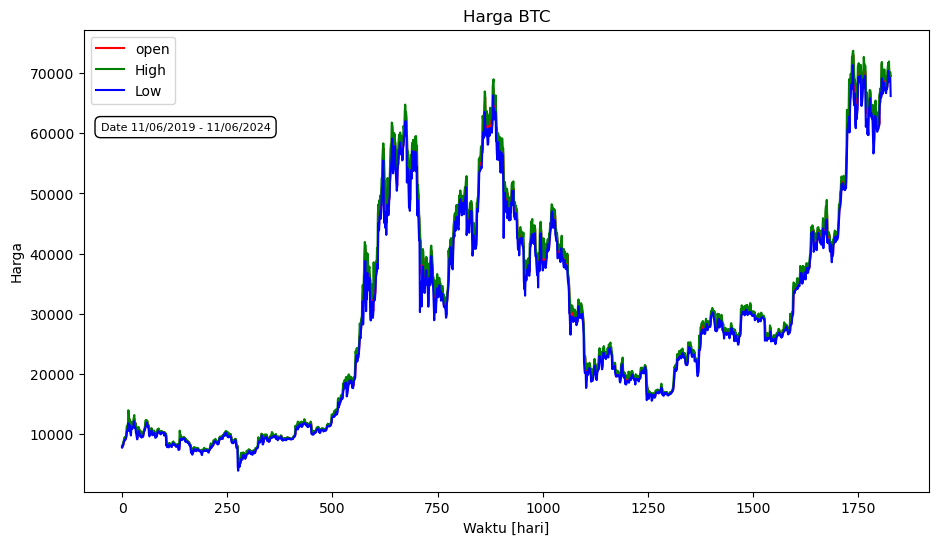

In [7]:
#Menampilkan History price Bitcoin
plt.figure(figsize=(24, 6));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.High.values, color='green', label='High')
plt.plot(df.Low.values, color='blue', label='Low')

plt.title('Harga BTC')
plt.xlabel('Waktu [hari]')
plt.ylabel('Harga')
plt.legend(loc='best')
plt.text(0.02, 0.8, f'Date 11/06/2019 - 11/06/2024', 
         transform=plt.gca().transAxes, fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.show()



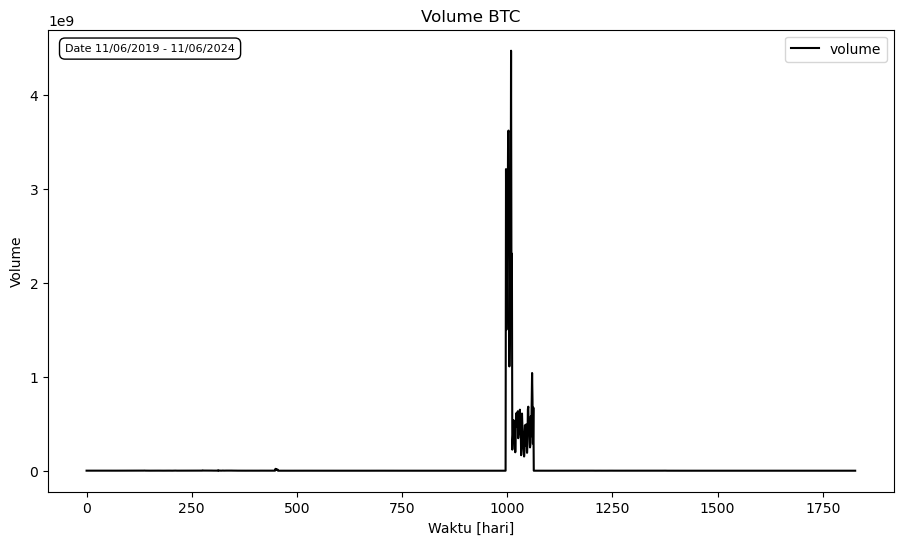

In [8]:
#Menampilkan volume Bitcoin
plt.figure(figsize=(24, 6));
plt.subplot(1,2,1);
plt.plot(df_filtered.Vol.values, color='black', label='volume')
plt.title('Volume BTC')
plt.xlabel('Waktu [hari]')
plt.ylabel('Volume')
plt.text(0.02, 0.97, f'Date 11/06/2019 - 11/06/2024', 
         transform=plt.gca().transAxes, fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.legend(loc='best');

In [9]:
#Memisahkan Data Menjadi Train, Test, dan Validation Set
from sklearn.model_selection import train_test_split

# Pisahkan kolom target y (Price) dan kolom x (lainnya)
X = df_filtered.drop(columns=['Date', 'Vol'], axis=1)
y = df_filtered['Price']

# Bagi data menjadi train dan test set dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagi data train menjadi train dan validation set dengan rasio 80:20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



In [10]:
print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("")

print("Valuasi set shapes:")
print(f"X_test: {X_val.shape}")
print(f"y_test: {y_val.shape}")
print("")

print("Testing set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")
print("")

Training set shapes:
X_train: (1096, 4)
y_train: (1096,)

Valuasi set shapes:
X_test: (366, 4)
y_test: (366,)

Testing set shapes:
X_test: (366, 4)
y_test: (366,)



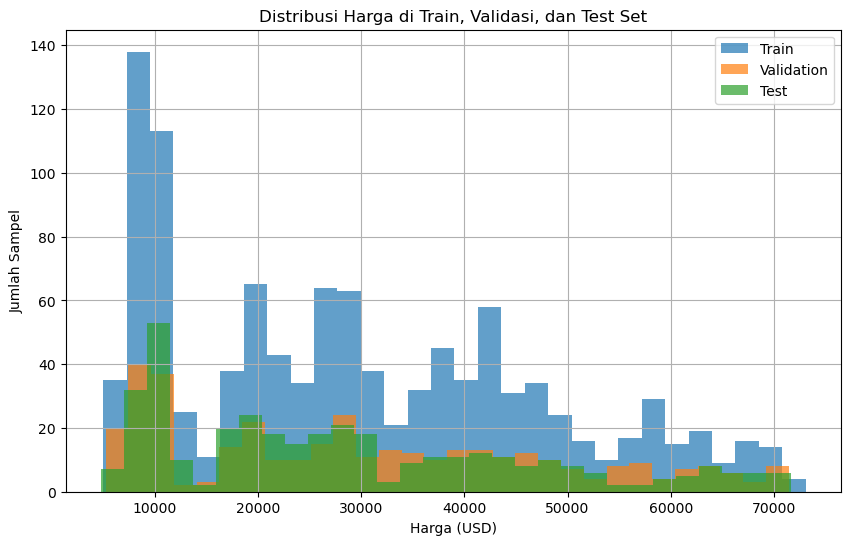

In [11]:
plt.figure(figsize=(10, 6))

#Distribusi set Train
plt.hist(y_train, bins=30, alpha=0.7, label='Train')

#Distribusi set Validasi
plt.hist(y_val, bins=30, alpha=0.7, label='Validation')

#Distribusi set Test
plt.hist(y_test, bins=30, alpha=0.7, label='Test')

plt.legend()
plt.xlabel('Harga (USD)')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Harga di Train, Validasi, dan Test Set')
plt.grid(True)
plt.show()


In [12]:
# Periksa nilai unik di y_train
print(np.unique(y_train))

# Pengelompokan label berkelanjutan ke dalam kategori
bins = np.linspace(min(y_train), max(y_train), 4) 
y_train_binned = np.digitize(y_train, bins)

print(np.unique(y_train_binned))  # Periksa label kategorikal baru





[ 5030.   5182.7  5361.4 ... 71470.2 72099.1 73066.3]
[1 2 3 4]


In [13]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Latih KNN regressor
knn_regressor.fit(X_train, y_train)

# Membuat prediksi dalam test set
y_pred = knn_regressor.predict(X_test)
print(y_pred)


[10310.46 16851.96 27083.58 20943.18 23999.36  9152.12 18920.18 39257.3
 56639.32  6374.28 16486.22  6914.94 21711.42 38766.58  9861.06 34738.84
 45048.34 29372.38 45006.06 11057.34  7436.64 39800.22  9256.92 13418.04
 19483.66  7932.76 48983.22 67507.78  6812.52 40073.48 19426.72 29490.
 10960.24 16790.9  27247.08 26068.34 66466.04 29348.02 12314.92  7281.34
 46531.36 21214.84 27039.34 49009.42 36739.28 34039.52 59407.38 49900.18
 10201.06 20981.54 50366.02 37679.2  18418.44 23266.34 17020.4  19189.26
 30246.4  66056.84 47666.88 21806.7  25986.72 64573.46 59278.16 29721.04
 66556.12  6812.52 17819.88 20130.46  9586.84  7214.72  9159.42 26516.22
 40005.64 21213.2   9450.28 48811.06  8155.52 23294.36 67730.04 20192.68
 61186.88 42459.42 32139.18 20042.42 26083.18 23029.08 39406.18 19892.54
 51890.52 25961.54  8761.4  27535.46 47666.88  9341.14 38747.88 26862.3
 23029.08 21807.12 47196.18 10746.28 28396.28  8126.14 42324.96 27990.9
 26619.66 18390.22  9716.82  7396.32  9431.74 20495.56 2

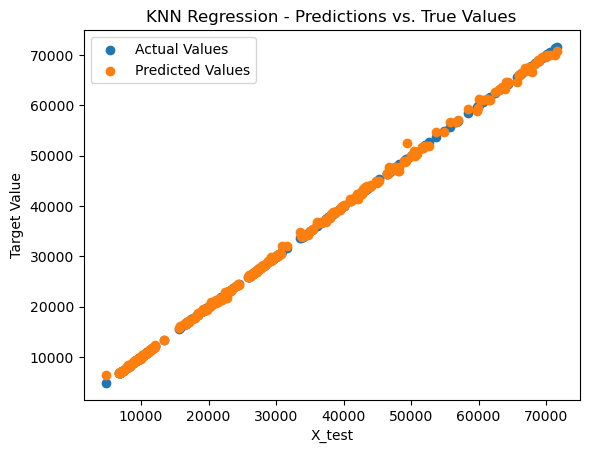

In [14]:
# Konversi X_test ke array numpy jika diperlukan
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Assuming you have X_test and y_test (replace with actual data)
plt.scatter(X_test_np[:, 0], y_test, label='Actual Values')
plt.scatter(X_test_np[:, 0], y_pred, label='Predicted Values')
plt.xlabel('X_test')  # Sesuaikan label berdasarkan nama fitur Anda
plt.ylabel('Target Value')
plt.title('KNN Regression - Predictions vs. True Values')
plt.legend()
plt.show()

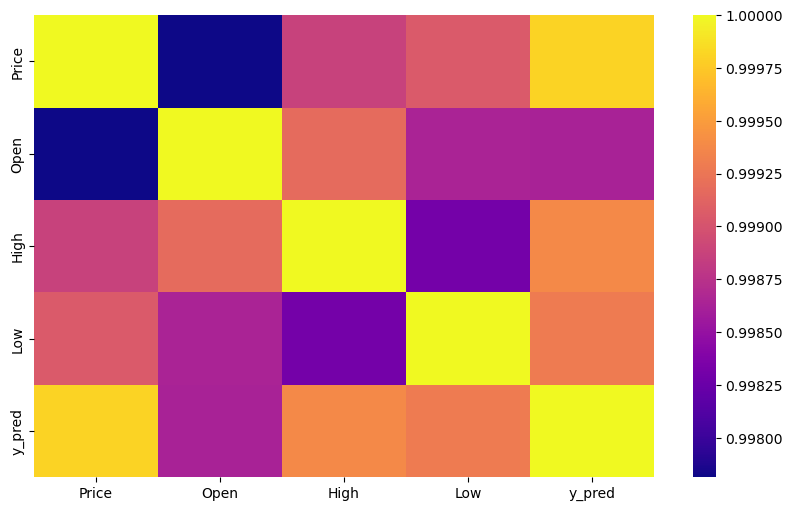

In [15]:
df_test_copy = X_test.copy()  # Create a copy to avoid modifying original data
df_test_copy['y_pred'] = y_pred

# Print the modified DataFrame with predictions
df_test_copy.head()

# Calculate correlation matrix (including predicted values)
correlation = df_test_copy.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap="plasma")
plt.show()

In [16]:
# Menghitung performa dengan berbagai model
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Dengan asumsi y_test adalah array NumPy atau Seri Pandas
if isinstance(y_test, np.ndarray) or isinstance(y_test, pd.Series):
    min_value = y_test.min()
    max_value = y_test.max()
else:
    if isinstance(y_test, list):
        min_value = min(y_test)
        max_value = max(y_test)
    else:
        raise ValueError(f"Tipe data tidak didukung untuk y_test: {type(y_test)}")

# Normalized Root Mean Squared Error
nrmse = np.sqrt(mse) / (max_value - min_value)

# Print hasil performa
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")


MSE: 121195.5193
RMSE: 348.1315
MAE: 188.3786
R-squared: 0.9996
NRMSE: 0.0052
